# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Argitha Trihapsari
- **Email:** M206B4KX0618@bangkit.academy
- **ID Dicoding:** argitha_trihapsari

## Menentukan Pertanyaan Bisnis

- Pada jam berapa layanan bike sharing paling banyak digunakan ?
- Apakah jumlah peminjaman lebih banyak atau lebih sedikit pada hari libur dibandingkan hari biasa ?

##Library yang Digunakan

In [1]:
import numpy as np #Untuk menangani operasi matematika tingkat tinggi
import pandas as pd #Untuk untuk memanipulasi, membersihkan, dan menganalisis data
import matplotlib.pyplot as plt #Untuk membuat berbagai grafik
import seaborn as sns #Untuk visualisasi grafis yang lebih estetik dan canggih

## Data Wrangling

### Gathering Data

In [2]:
hours_df = pd.read_csv("/content/hour.csv") #Untuk membaca file csv dan sidsimpan dalam datafreame hours_df
hours_df.head() #Menampilkan 5 baris teratas dari data hours_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
day_df = pd.read_csv("/content/day.csv") #Untuk membaca file CSV
day_df.head() #Menampilkan 5 baris teratas dari data day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

**Data Hours**

In [4]:
hours_df.info() #Memberikan informasi ringkas tentang struktur DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Terdapat kesalahan tipe data untuk kolom dteday, kolom tersebut harusnya direpresentasikan sebagai tipe data datetime bukan object.
- Serta kolom season, yr, mnth, hr, holiday, weekday, workingday, dan weathersit diubah menjadi category.
- Dapat dilihat pada info diatas, bahwa tidak terdapat missing value.

In [5]:
print("Jumlah duplikasi: ",hours_df.duplicated().sum()) #Untuk melihat jika ada data yang double

Jumlah duplikasi:  0


**Insight:**
- Tidak ada data yang terduplikat

In [6]:
hours_df.describe() #Untuk menampilkan deskripsi data

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pada deskripsi tabel kolom instan berisi indeks record atau baris jadi perhitungan statistik pada kolom ini tidak memiliki arti penting

**Data Day**

In [7]:
day_df.info() #Memberikan informasi ringkas tentang struktur DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Terdapat kesalahan tipe data untuk kolom dteday, kolom tersebut harusnya direpresentasikan sebagai tipe data datetime bukan object.
- Serta kolom season, yr, mnth, hr, holiday, weekday, workingday, dan weathersit diubah menjadi category.
- Dapat dilihat pada info diatas, bahwa tidak terdapat missing value

In [8]:
print("Jumlah duplikasi: ",day_df.duplicated().sum()) #Untuk melihat jika ada data yang double

Jumlah duplikasi:  0


**Insight:**
- Tidak ada data yang terduplikat

In [9]:
day_df.describe() #Untuk menampilkan deskripsi data

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Pada deskripsi tabel kolom instan berisi indeks record atau baris jadi perhitungan statistik pada kolom ini tidak memiliki arti penting

### Cleaning Data

**Data Hours**

In [10]:
hours_df = hours_df.drop(columns=['instant']) #Menghapus kolom instany
print(hours_df.head()) #Menampilkan 5 baris teratas dataframe

       dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1   0     1   0        0        6           0           1   
1  2011-01-01       1   0     1   1        0        6           0           1   
2  2011-01-01       1   0     1   2        0        6           0           1   
3  2011-01-01       1   0     1   3        0        6           0           1   
4  2011-01-01       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed  casual  registered  cnt  
0  0.24  0.2879  0.81        0.0       3          13   16  
1  0.22  0.2727  0.80        0.0       8          32   40  
2  0.22  0.2727  0.80        0.0       5          27   32  
3  0.24  0.2879  0.75        0.0       3          10   13  
4  0.24  0.2879  0.75        0.0       0           1    1  


**Insight:**
- Pada deskripsi tabel kolom instan berisi indeks record atau baris jadi perhitungan statistik pada kolom ini tidak memiliki arti penting jadi saya menghapusnya

In [11]:
hours_df['dteday'] = pd.to_datetime(hours_df['dteday']) #Mengkonversi kolom dteday menjadi tipe datetime

category_columns = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit'] #Mengubah menjadi tipe kategori

for col in category_columns:
    hours_df[col] = hours_df[col].astype('category')

**Insight:**
- Mengubah tipe data kolom dteday dari tipe data objet menjadi tipe data datetime.
- Mengubah beberapa kolom menjadi tipe data kategori.

In [12]:
hours_df.info() #Menampilkan tipe data dari semua kolom data hours

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  category      
 2   yr          17379 non-null  category      
 3   mnth        17379 non-null  category      
 4   hr          17379 non-null  category      
 5   holiday     17379 non-null  category      
 6   weekday     17379 non-null  category      
 7   workingday  17379 non-null  category      
 8   weathersit  17379 non-null  category      
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: category(8), dateti

In [13]:
print(hours_df.head()) #Menampilkan 5 baris teratas dari dataframe

      dteday season yr mnth hr holiday weekday workingday weathersit  temp  \
0 2011-01-01      1  0    1  0       0       6          0          1  0.24   
1 2011-01-01      1  0    1  1       0       6          0          1  0.22   
2 2011-01-01      1  0    1  2       0       6          0          1  0.22   
3 2011-01-01      1  0    1  3       0       6          0          1  0.24   
4 2011-01-01      1  0    1  4       0       6          0          1  0.24   

    atemp   hum  windspeed  casual  registered  cnt  
0  0.2879  0.81        0.0       3          13   16  
1  0.2727  0.80        0.0       8          32   40  
2  0.2727  0.80        0.0       5          27   32  
3  0.2879  0.75        0.0       3          10   13  
4  0.2879  0.75        0.0       0           1    1  


**Data Day**

In [14]:
day_df = day_df.drop(columns=['instant']) #Menghapus kolom instant
print(hours_df.head()) #Menampilkan 5 baris teratas dari dataframe

      dteday season yr mnth hr holiday weekday workingday weathersit  temp  \
0 2011-01-01      1  0    1  0       0       6          0          1  0.24   
1 2011-01-01      1  0    1  1       0       6          0          1  0.22   
2 2011-01-01      1  0    1  2       0       6          0          1  0.22   
3 2011-01-01      1  0    1  3       0       6          0          1  0.24   
4 2011-01-01      1  0    1  4       0       6          0          1  0.24   

    atemp   hum  windspeed  casual  registered  cnt  
0  0.2879  0.81        0.0       3          13   16  
1  0.2727  0.80        0.0       8          32   40  
2  0.2727  0.80        0.0       5          27   32  
3  0.2879  0.75        0.0       3          10   13  
4  0.2879  0.75        0.0       0           1    1  


**Insight:**
- Pada deskripsi tabel kolom instan berisi indeks record atau baris jadi perhitungan statistik pada kolom ini tidak memiliki arti penting jadi saya menghapusnya

In [15]:
day_df['dteday'] = pd.to_datetime(day_df['dteday']) #Mengkonversi kolom dteday menjadi tipe datetime

category_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'] #Mengubah menjadi tipe data kategori

for col in category_columns:
    day_df[col] = day_df[col].astype('category')

**Insight:**
- Mengubah tipe data kolom dteday dari tipe data objet menjadi tipe data datetime.
- Mengubah beberapa kolom menjadi tipe data kategori.

In [16]:
day_df.info() #Menampilkan tipe data dari semua kolom data day

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   yr          731 non-null    category      
 3   mnth        731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(4), int64(3)
memory usage: 52.2

In [17]:
print(day_df.head()) #Menampilkan 5 baris teratas dataframe

      dteday season yr mnth holiday weekday workingday weathersit      temp  \
0 2011-01-01      1  0    1       0       6          0          2  0.344167   
1 2011-01-02      1  0    1       0       0          0          2  0.363478   
2 2011-01-03      1  0    1       0       1          1          1  0.196364   
3 2011-01-04      1  0    1       0       2          1          1  0.200000   
4 2011-01-05      1  0    1       0       3          1          1  0.226957   

      atemp       hum  windspeed  casual  registered   cnt  
0  0.363625  0.805833   0.160446     331         654   985  
1  0.353739  0.696087   0.248539     131         670   801  
2  0.189405  0.437273   0.248309     120        1229  1349  
3  0.212122  0.590435   0.160296     108        1454  1562  
4  0.229270  0.436957   0.186900      82        1518  1600  


In [18]:
#Menggabungkan data_hours dan data_day dengan inner join berdasarkan kolom 'dteday'
bike_sharing = pd.merge(hours_df, day_df, on='dteday', suffixes=('_hours', '_day'), how='inner')

#Menampilkan hasil penggabungan
print(bike_sharing)

          dteday season_hours yr_hours mnth_hours  hr holiday_hours  \
0     2011-01-01            1        0          1   0             0   
1     2011-01-01            1        0          1   1             0   
2     2011-01-01            1        0          1   2             0   
3     2011-01-01            1        0          1   3             0   
4     2011-01-01            1        0          1   4             0   
...          ...          ...      ...        ...  ..           ...   
17374 2012-12-31            1        1         12  19             0   
17375 2012-12-31            1        1         12  20             0   
17376 2012-12-31            1        1         12  21             0   
17377 2012-12-31            1        1         12  22             0   
17378 2012-12-31            1        1         12  23             0   

      weekday_hours workingday_hours weathersit_hours  temp_hours  ...  \
0                 6                0                1        0.24  ...   

In [19]:
#Menyimpan data yang telah dibersihkan
bike_sharing.to_csv("bike_sharing.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore Data Hour

In [20]:
hours_df.describe(include="all") #Memberikan statistik deskriptif dari dataframe.

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4.0,2.0,12.0,24.0,2.0,7.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,3.0,1.0,5.0,17.0,0.0,6.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496.0,8734.0,1488.0,730.0,16879.0,2512.0,11865.0,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Kolom hr (jam) memiliki frekuensi tertinggi pada jam 17.00, dengan frekuesni kejadian 730.
- Rata-rata jumlah pengguna registered lebih tinggi dibandingkan dengan pengguna casual. Ini menunjukkan bahwa pengguna terdaftar lebih konsisten menggunakan layanan ini, terutama pada jam-jam tertentu seperti jam 17.00.

In [21]:
#Menghitung jumlah total sepeda yang digunakan (baik oleh pengguna casual maupun terdaftar) berdasarkan jam (hr).
usage_by_hour = hours_df.groupby(by="hr").agg({
    "cnt": "sum",
    "casual": "sum",
    "registered": "sum"
}).reset_index()
#Dataframe usage_by_hour dicetak untuk menampilkan hasilnya.
print(usage_by_hour)

    hr     cnt  casual  registered
0    0   39130    7375       31755
1    1   24164    4709       19455
2    2   16352    3412       12940
3    3    8174    1893        6281
4    4    4428     874        3554
5    5   14261    1012       13249
6    6   55132    3017       52115
7    7  154171    8037      146134
8    8  261001   15761      245240
9    9  159438   22458      136980
10  10  126257   33789       92468
11  11  151320   43286      108034
12  12  184414   49718      134696
13  13  184919   52713      132206
14  14  175652   55089      120563
15  15  183149   54606      128543
16  16  227748   53834      173914
17  17  336860   54220      282640
18  18  309772   44496      265276
19  19  226789   35505      191284
20  20  164550   26378      138172
21  21  125445   20570      104875
22  22   95612   16200       79412
23  23   63941   11065       52876


<ipython-input-21-03152693bd97>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  usage_by_hour = hours_df.groupby(by="hr").agg({


**Insight:**
- Jam penggunaan tertinggi terlihat pada jam 17 (336.860) dan 18 (309.772), yang menunjukkan bahwa layanan sepeda paling banyak digunakan menjelang sore.
- Jumlah pengguna registered jauh lebih tinggi dibandingkan dengan pengguna casual.

### Explore Data Day

In [22]:
#Mengelompokkan Data Berdasarkan Kolom holiday
summary = day_df.groupby('holiday').agg(total_peminjaman=('cnt', 'sum'),
                                         rata_rata_peminjaman=('cnt', 'mean')).reset_index()
#Mengganti Nilai pada Kolom holiday dengan Label yang Lebih Jelas
summary['holiday'] = summary['holiday'].replace({0: 'Hari Biasa', 1: 'Hari Libur'})
#Menampilkan hasil
print(summary)

      holiday  total_peminjaman  rata_rata_peminjaman
0  Hari Biasa           3214244           4527.104225
1  Hari Libur             78435           3735.000000


<ipython-input-22-5579503f5b71>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = day_df.groupby('holiday').agg(total_peminjaman=('cnt', 'sum'),


**Insight:**
- Total peminjaman sepeda yang terjadi pada hari-hari biasa adalah 3,214,244. Ini menunjukkan bahwa lebih banyak orang memilih untuk meminjam sepeda pada hari-hari biasa dibandingkan hari libur.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada jam berapa layanan bike sharing paling banyak digunakan?

<ipython-input-23-64e3d6203c68>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hr', y='cnt', data=usage_by_hour, palette='coolwarm')


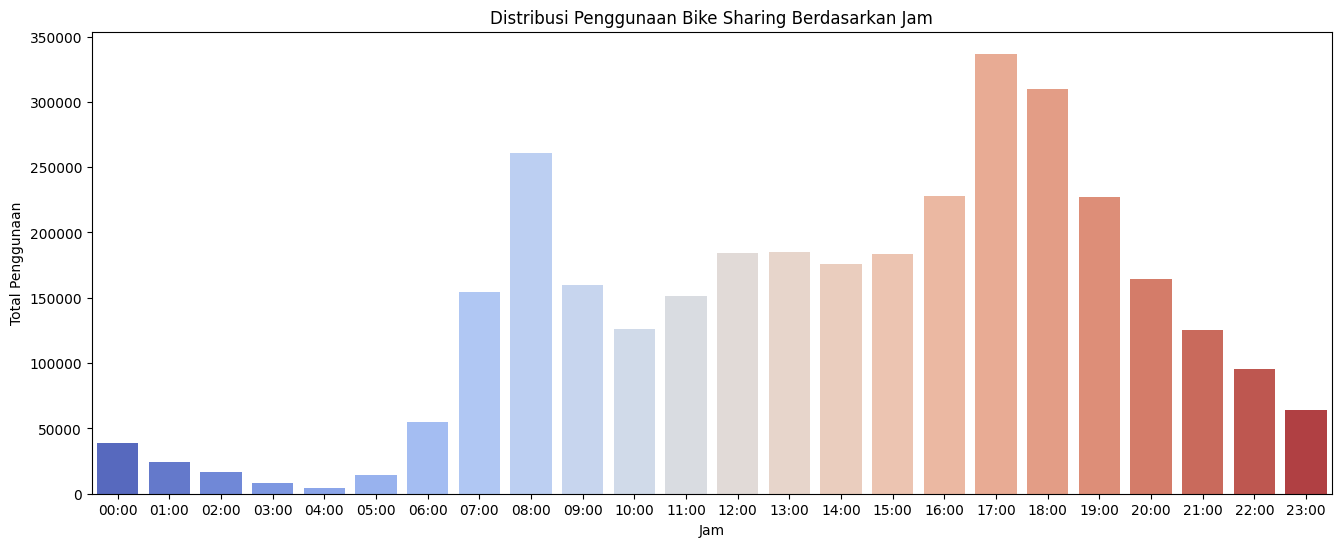

In [23]:
#Membuat Label Jam
hour_labels = [f"{hour:02d}:00" for hour in usage_by_hour['hr']]

#Visualisasi
plt.figure(figsize=(16, 6))
sns.barplot(x='hr', y='cnt', data=usage_by_hour, palette='coolwarm')
plt.title('Distribusi Penggunaan Bike Sharing Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Total Penggunaan')
plt.xticks(ticks=usage_by_hour['hr'], labels=hour_labels)
plt.show()

**Insight:**
- Sumbu X mewakili jam dalam satu hari (dari jam 0 sampai jam 23), yang menunjukkan kapan penggunaan layanan terjadi.
- Sumbu Y menunjukkan total penggunaan, yaitu jumlah kali layanan bike sharing digunakan pada setiap jam.
- Puncak pertama penggunaan terjadi sekitar jam 7 pagi (sekitar 250.000 penggunaan), yang kemungkinan besar mencerminkan orang-orang yang menggunakan bike sharing untuk perjalanan pagi menuju tempat kerja atau sekolah.
- Puncak kedua yang lebih tinggi terjadi pada jam 17.00 sore (sekitar 330.000 penggunaan), kemungkinan berhubungan dengan waktu pulang kerja atau aktivitas sore lainnya.
- Dari grafik tersebut dapat dilihat bahwa bike sharing paling banyak digunakan pada jam 17.00
- Analisis ini dapat membantu perusahaan menyesuaikan jumlah sepeda yang tersedia pada jam-jam sibuk untuk memenuhi permintaan pengguna. Perusahaan juga dapat melakukan promosi atau diskon pada jam-jam sepi untuk mendorong penggunaan di waktu yang kurang populer.

### Pertanyaan 2: Apakah jumlah peminjaman lebih banyak atau lebih sedikit pada hari libur dibandingkan hari biasa?

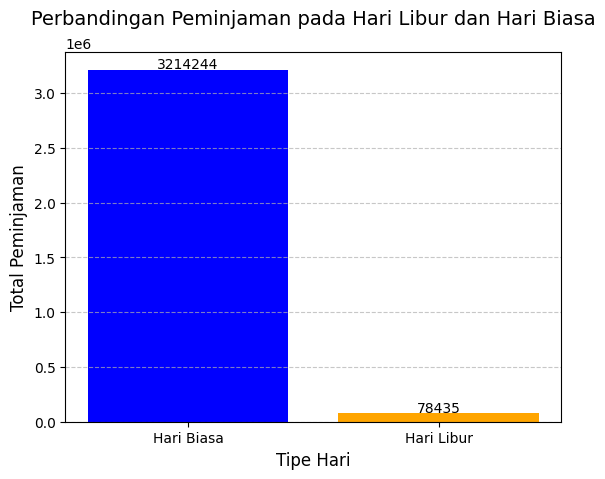

In [24]:
#Membuat Grafik Batang
plt.bar(summary['holiday'], summary['total_peminjaman'], color=['blue', 'orange'])

for i, v in enumerate(summary['total_peminjaman']):
    plt.text(i, v + 10000, str(v), ha='center', fontsize=10)

plt.xlabel('Tipe Hari', fontsize=12)
plt.ylabel('Total Peminjaman', fontsize=12)
plt.title('Perbandingan Peminjaman pada Hari Libur dan Hari Biasa', fontsize=14, pad=20)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**Insight:**
- Sumbu X menunjukkan tipe hari, yaitu dua kategori: Hari Biasa dan Hari Libur.
- Sumbu Y menunjukkan total peminjaman, dalam satuan jutaan (1e6 = 1 juta), yang mengindikasikan jumlah total peminjaman layanan bike sharing pada kedua tipe hari tersebut.
- Hari Biasa memiliki jumlah peminjaman yang sangat tinggi, mencapai 3214244 peminjaman sedangkan,
- Hari Libur,  memiliki jumlah peminjaman yang jauh lebih rendah yaitu 78435
- Dari grafik tersebut dapat dilihat bahwa layanan bike sharing jauh lebih banyak digunakan pada hari biasa dibandingkan hari libur
- Analisis ini dapat membantu perusahaan untuk mempertimbangkan menyelenggarakan acara komunitas atau promosi yang berhubungan dengan liburan yang dapat menarik lebih banyak pengguna untuk meminjam sepeda.

### Analisis Lanjutan

Pada bagian ini melakukan analisis deret waktu

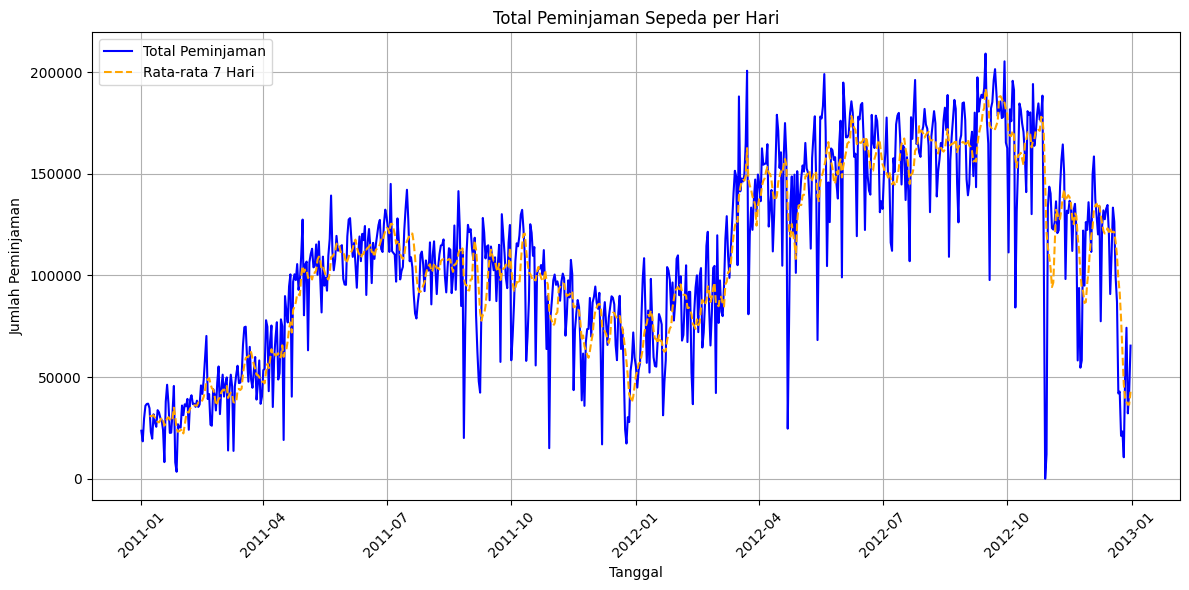

In [25]:
#Menghitung total peminjaman per hari
daily_rentals = bike_sharing.groupby('dteday')['cnt_day'].sum().reset_index()

#Mengatur 'dteday' sebagai indeks
daily_rentals.set_index('dteday', inplace=True)

# Menghitung rata-rata peminjaman harian dengan window 7 hari
daily_rentals['average_rentals'] = daily_rentals['cnt_day'].rolling(window=7).mean()  # Rata-rata 7 hari

#Visualisasi
plt.figure(figsize=(12, 6))
plt.plot(daily_rentals.index, daily_rentals['cnt_day'], label='Total Peminjaman', color='blue')
plt.plot(daily_rentals.index, daily_rentals['average_rentals'], label='Rata-rata 7 Hari', color='orange', linestyle='--')

plt.title('Total Peminjaman Sepeda per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

**Insight**

*   Sumbu X (Horizontal): Mewakili tanggal dari awal tahun 2011 hingga akhir tahun 2012.
*   Sumbu Y (Vertikal): Mewakili jumlah peminjaman sepeda per hari, berkisar dari 0 hingga lebih dari 200.000.
*   Garis biru: Menunjukkan total jumlah peminjaman sepeda harian. Ada banyak fluktuasi, yang menunjukkan adanya variabilitas yang signifikan dalam jumlah peminjaman sepeda setiap harinya.
*   Garis oranye putus-putus: Merupakan rata-rata pergerakan 7 hari, yang digunakan untuk menghaluskan data dan memberikan gambaran tren umum peminjaman sepeda dari waktu ke waktu.
*   Peminjaman sepeda cenderung meningkat secara bertahap hingga mencapai puncaknya di paruh kedua 2012, dan setelah itu mulai mengalami penurunan tajam pada akhir 2012 hingga awal 2013.
*   Grafik ini menunjukkan tren peningkatan peminjaman sepeda dengan fluktuasi harian yang signifikan, diikuti oleh penurunan tajam pada akhir periode yang ditampilkan.







## Conclusion



*   Kesimpulan pertanyaan 1: Berdasarkan analisis terlihat bahwa penggunaan layanan ini memuncak pada dua periode utama: pagi hari sekitar jam 7 dan sore hari sekitar jam 17. Puncak pertama (sekitar 250.000 penggunaan) mencerminkan penggunaan pada jam-jam commuting pagi saat orang-orang berangkat kerja atau sekolah, sedangkan puncak kedua (sekitar 330.000 penggunaan) terjadi pada sore hari ketika banyak orang pulang kerja atau terlibat dalam aktivitas sore lainnya. Strategi bisnis yang dapat diambil adalah mengoptimalkan operasional dengan menyediakan lebih banyak sepeda pada jam-jam sibuk, terutama di sore hari.
*   Kesimpulan Pertanyaan 2: Berdasarkan analisis, terlihat bahwa jumlah peminjaman layanan bike sharing jauh lebih tinggi pada hari biasa dibandingkan dengan hari libur. Pada hari biasa, jumlah peminjaman mencapai 3,214,244 sementara pada hari libur hanya 78,435. Hal ini menunjukkan bahwa pengguna lebih aktif menggunakan layanan pada hari kerja, mungkin karena kebutuhan transportasi untuk bekerja atau aktivitas rutin lainnya. Strategi bisnis yang dapat diambil adalah mengoptimalkan layanan pada hari libur dengan cara meningkatkan promosi atau menyelenggarakan acara komunitas.

